In [166]:
import matplotlib.pyplot as plt
import cv2 as cv
import SternBrocot
import estimater
import numpy as np
import time
import DSL
import copy
I = cv.imread('./bar.png')
#J = I.copy()#I[:,:,1]
J = cv.cvtColor(I, cv.COLOR_BGR2GRAY)
I = cv.cvtColor(I, cv.COLOR_BGR2RGB)
#I = I[:,:,1]
#I = cv.resize(I, (int(alpha*I.shape[1]), int(alpha*I.shape[0])))
J = cv.normalize(J, None, 0, 255, cv.NORM_MINMAX)

In [167]:
def gray_transform(I, n, x, y):
    H, W = I.shape
    k = (n-1)//2
    dilates = np.zeros((H,W))
    erodes = np.zeros((H,W))
    for a in range(n):
        for b in range(k+1):
            aa = a - k
            bb = b - k
            if aa == 0 and bb == 0: continue
            mu    = 0
            
            G = np.gcd(np.abs(aa),np.abs(bb))
            aa, bb = aa//G, bb//G
            omega = np.maximum(np.abs(aa), np.abs(bb))
            if ( G == 1):
                if omega % 2 == 1:
                    ddepth = omega + 2
                else:
                    ddepth = omega + 1
            else:
                if omega % 2 == 1:
                    ddepth = omega + 2 + (2*(G-1))
                else:
                    ddepth = omega + 1 + (2*(G-1))
                    
            center = (ddepth-1)//2
            # Construct the line
            #T, _, _ = DSL.construct(aa//G, bb//G, mu, omega, square)
            X = np.linspace(0, ddepth-1, ddepth)
            Y = np.linspace(0, ddepth-1, ddepth)
            xx , yy = np.meshgrid(X-center, Y-center)
            kernel = np.array((0 <= (aa * xx - bb * yy)) & ((aa * xx - bb * yy) < omega), dtype=np.uint8)
            dil = cv.morphologyEx(I, cv.MORPH_DILATE, kernel)
            ero = cv.morphologyEx(I, cv.MORPH_ERODE, kernel)
            
            dilates[a,b] = dil[y,x]
            erodes[a,b]  = ero[y,x]
    
    T = np.flipud(np.fliplr(dilates[:, 0:k+1]))
    dilates[:, k::] = T
    dilates[k,k] = I[y,x]
    #dilates[:,:] = dilates - I[y,x]
    T = np.fliplr(np.flipud(erodes[:, 0:k+1]))
    erodes[:, k::] = T
    erodes[k,k] = I[y,x]
    #erodes[:,:] = erodes - I[y,x]
    return dilates, erodes

In [168]:
x, y, n = 32, 25, J.shape[0]
#dilates, erodes, fracs = estimater.compute_for_graylevel(I, max_depth=15, max_width=1)
dilates, erodes = gray_transform(J, n, x, y)
Td, Te = np.zeros((n,n)), np.zeros((n,n))
#for x in range(J.shape[0]):
#    for y in range(J.shape[1]):
#        dilates, erodes = gray_transform(J, n, x, y)
#        Td += dilates
#        Te += erodes
        

49.0
189.0


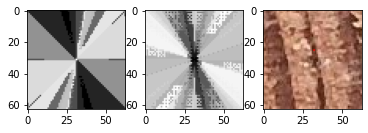

In [171]:
fig = plt.figure()
ax1 = fig.add_subplot(131)
ax1.imshow(erodes, cmap='gray')
ax2 = fig.add_subplot(132)
ax2.imshow(dilates, cmap='gray')
K = np.copy(I)
K[y,x,:] = [255,0,0]
ax3 = fig.add_subplot(133)
ax3.imshow(K)
print(np.amax(erodes) - np.amin(erodes))
print(np.amax(dilates) - np.amin(dilates))
plt.im

In [203]:
k = np.array(960939379918958884971672962127852754715004339660129306651505519271702802395266424689642842174350718121267153782770623355993237280874144307891325963941337723487857735749823926629715517173716995165232890538221612403238855866184013235585136048828693337902491454229288667081096184496091705183454067827731551705405381627380967602565625016981482083418783163849115590225610003652351370343874461848378737238198224849863465033159410054974700593138339226497249461751545728366702369745461014655997933798537483143786841806593422227898388722980000748404719, dtype='object')
f = np.zeros((17,106), dtype='object');
for xx in range(106):
    for yy in range(17):
        f[yy,xx] = ( 0.5 < np.floor( (np.floor((k+yy)/17, dtype='object') * 2 ** (-17 * xx - (k+yy) % 17 )) % 2, dtype='object' ) )

OverflowError: integer division result too large for a float